# Goal:
Here we are dealing with a titanic dataset. We aim to predict the number of survival using the given features.

# 1- Load the Data: Import the necessary libraries and load the training and test datasets into pandas DataFrames.

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

# 2- Explore the Data:

In [3]:
# Check the number of rows and columns in df: 
df.shape

(891, 12)

In [4]:
# Display the first few rows: 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display summary statistics of numerical columns: 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Based on the provided dataset, we want to predict the survival of passengers using the following features:

#PassengerId: Unique identifier for each passenger

#Pclass: Passenger class (1st, 2nd, or 3rd class)

#Name: Passenger's name

#Sex: Passenger's gender (male or female)

#Age: Passenger's age

#SibSp: Number of siblings/spouses aboard the Titanic

#Parch: Number of parents/children aboard the Titanic

#Ticket: Ticket number

#Fare: Fare paid by the passenger

#Cabin: Cabin number

#Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
#Check the data types of columns in df: 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#Identify and count missing values in df: 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Dropping irrelevant columns
df = df.drop(['Cabin'], axis=1)

# Impute missing values in the 'Age' column with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Impute missing values in the 'Embarked' column with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
# Verify the updated dataset after handling missing values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


According to our observations, we drop 'Cabin' column and impute the missing values in 'Age' using the mean.

Convert Categorical Variables:

In [12]:
# Convert 'Sex' column to numerical representation
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' column to numerical representation using one-hot encoding
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_encoded], axis=1)
df.drop('Embarked', axis=1, inplace=True)

# Check the updated dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [13]:
df=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


<AxesSubplot:>

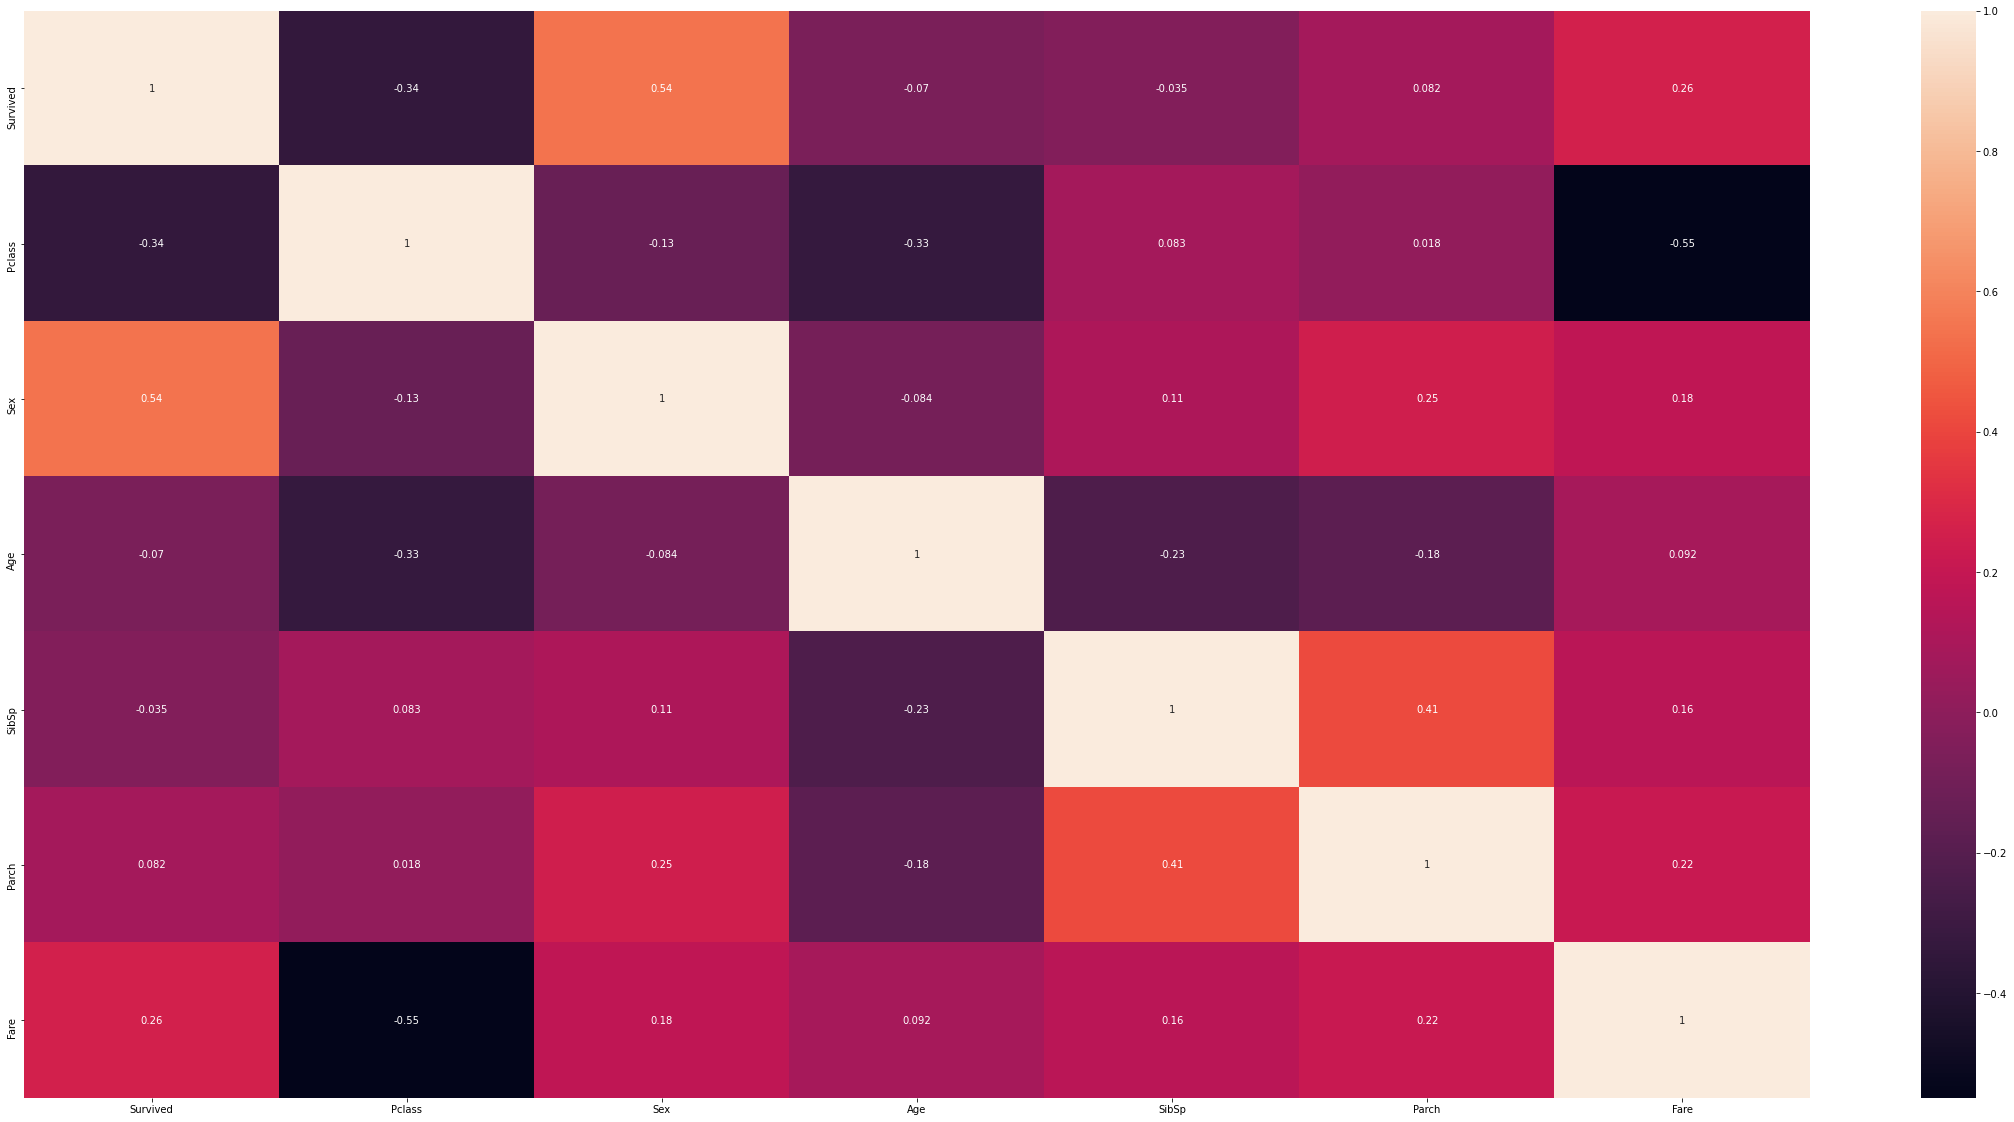

In [21]:
# We need to do some preliminary work, and ensure that the Matplotlib plot is big enough. 
# Call .figure() on plt, and plug in the parameter figsize=(40,20) (or similar suitably large dimensions)
plt.figure(figsize=(40,20))

# To create an annotated heatmap of the correlations, we call the heatmap() method on our sns object.
# Ensure to plug in, as first parameter, wine.corr(), and as second parameter, annot=True (so the graph is annotated)
sns.heatmap(df.corr(), annot=True)

# 3. Modeling 

In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [19]:
y_pred = (y_pred_proba > 0.5).astype(int)

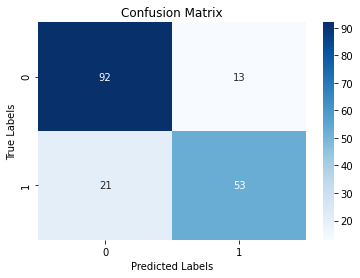

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix provides insights into the true positive, true negative, false positive, and false negative predictions.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8100558659217877
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1-Score: 0.7571428571428571


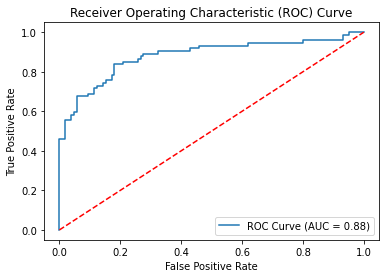

In [24]:
# Receiver Operating Characteristic (ROC) Curve:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve visualizes the trade-off between true positive rate and false positive rate, demonstrating the model's performance in distinguishing between survival and non-survival.

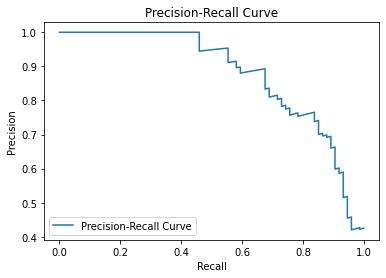

In [25]:
# Precision-Recall Curve:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

The precision-recall curve illustrates the precision and recall values at various thresholds, providing insights into the model's ability to correctly identify positive instances.

# 4- Test Statistical Hypotheses

We can evaluate the model's performance against a baseline or reference point to assess its statistical significance. Here's an example:

Null Hypothesis (H0): The model's performance is not significantly better than random guessing.
Alternative Hypothesis (HA): The model's performance is significantly better than random guessing.

In [26]:
from scipy.stats import ttest_1samp

baseline_accuracy = 0.5  # Baseline accuracy for random guessing
model_accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(y_pred, baseline_accuracy)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject null hypothesis. The model's accuracy is significantly better than random guessing.")
else:
    print("Fail to reject null hypothesis. The model's accuracy is not significantly better than random guessing.")

Reject null hypothesis. The model's accuracy is significantly better than random guessing.
